In [2]:
# Required libraries import karte hain
import pandas as pd                # data load aur handling
import numpy as np                 # numerical operations
import matplotlib.pyplot as plt    # graphs ke liye
import seaborn as sns              # pretty graphs
from sklearn.model_selection import train_test_split  # data split
from sklearn.feature_extraction.text import TfidfVectorizer  # text ko numbers me convert
from sklearn.naive_bayes import MultinomialNB        # simple classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Dataset download link (Kaggle SMS Spam Collection)
# Google Colab me direct load karne ka tariqa
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"

# Data load karte hain
data = pd.read_csv(url, sep="\t", header=None, names=["label", "message"])

# Pehle 5 rows dekhte hain
data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Dataset size: (5572, 2)
label
ham     4825
spam     747
Name: count, dtype: int64


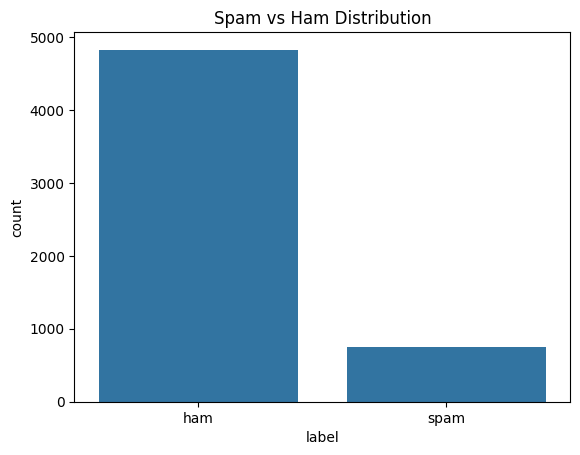

In [4]:
# Data shape (kitni rows, columns hain?)
print("Dataset size:", data.shape)

# Class distribution dekhte hain
print(data['label'].value_counts())

# Graph plot
sns.countplot(x='label', data=data)
plt.title("Spam vs Ham Distribution")
plt.show()


In [5]:
import re
import string

def clean_text(text):
    # Lowercase kar dete hain
    text = text.lower()
    # URLs remove
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # Numbers remove
    text = re.sub(r'\d+', '', text)
    # Punctuation remove
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Extra spaces hatao
    text = text.strip()
    return text

# Apply cleaning function
data['clean_message'] = data['message'].apply(clean_text)

# Sample dekho
data[['message', 'clean_message']].head()


,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [6]:
# X = input (messages), y = target (labels)
X = data['clean_message']
y = data['label']

# Train (80%), Test (20%) split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (4457,)
Test size: (1115,)


In [7]:
# TF-IDF vectorizer banate hain
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)

# Train aur test data ko vectorize karte hain
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Feature matrix shape:", X_train_tfidf.shape)


Feature matrix shape: (4457, 3000)


In [8]:
from sklearn.naive_bayes import MultinomialNB


# Model banate hain
model = MultinomialNB()

# Train karte hain
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)


Accuracy: 0.97847533632287


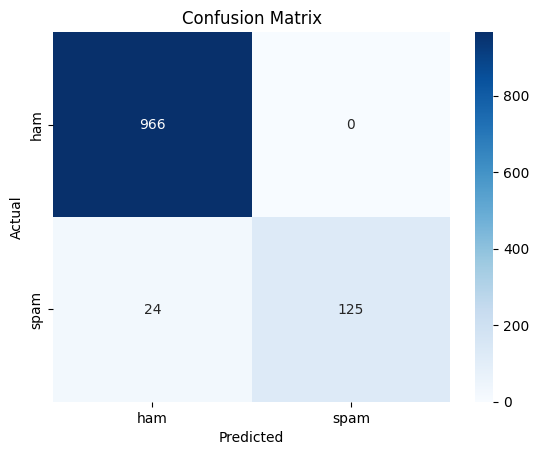

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [9]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [13]:
# New SMS messages test karte hain
sample_msgs = [
    "Congratulations! You have won a free iPhone. Click here to claim your prize!",
    "Limited offer! Win cash now by sending SMS to 12345!",
    "Limited offer! Win cash now by sending SMS to 12345!",
    "we can offer free prize!"
]

# Clean + Vectorize + Predict
sample_clean = [clean_text(msg) for msg in sample_msgs]
sample_tfidf = tfidf.transform(sample_clean)
predictions = model.predict(sample_tfidf)

for msg, label in zip(sample_msgs, predictions):
    print(f"Message: {msg} → Prediction: {label}")


Message: Congratulations! You have won a free iPhone. Click here to claim your prize! → Prediction: spam
Message: Limited offer! Win cash now by sending SMS to 12345! → Prediction: spam
Message: Limited offer! Win cash now by sending SMS to 12345! → Prediction: spam
Message: we can offer free prize! → Prediction: spam
